In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import time
import numpy as np

#from mxnet import nd, autograd, gluon
##from mxnet.gluon import nn, rnn
#import mxnet as mx
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client  import GoogleCredentials
!pip install -q xlrd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
!pip install yfinance
!pip install ta 
import pandas as pd
import yfinance as yf
#from yahoofinancials import YahooFinancials
import pandas_datareader as pdr
import ta
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

from keras import Sequential
from keras.layers import Dense, LSTM,Dropout
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D,Convolution1D
from keras.layers import Dense, Activation, Flatten, Reshape,RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import mean_squared_error


In [ ]:
#!pip install tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)
#!pip install tensorflow==2.0.0-alpha0

2.7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client  import GoogleCredentials
!pip install -q xlrd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

auth.authenticate_user()
gauth = GoogleAuth()


gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'11DfDjmONdUK9RIQXjkFm908Rmr_HYpsH'}) 
downloaded.GetContentFile('sentiment.csv')
sentiment_data = pd.read_csv('sentiment.csv')
sentiment_data


,Symbol,Date,Sentiment
0,AAPL,2009-07-10,2.875741e-12
1,AAPL,2009-07-11,9.999509e-01
2,AAPL,2009-07-13,9.748901e-01
3,AAPL,2009-07-29,2.116751e-03
4,AAPL,2009-07-30,6.927493e-04
...,...,...,...
68411,WMT,2019-12-28,8.888758e-01
68412,WMT,2019-12-29,6.697813e-01
68413,WMT,2019-12-30,9.999999e-01
68414,WMT,2020-07-20,6.829819e-01


In [ ]:

# Request data via Yahoo public API
def get_data(symbol):
    if symbol=='BRK.A':
      symbol='BRK-A'
    if symbol=='BRK.B':
        symbol='BRK-B'
    df = yf.download(symbol, 
                          start='2013-01-01', 
                          end='2020-07-21', 
                          progress=False,
    )
    #df['name']=symbol
    return df
   

In [ ]:
symbols=sentiment_data.Symbol.unique()
symbols

array(['AAPL', 'ADBE', 'AMZN', 'BAC', 'BRK.A', 'BRK.B', 'DIA', 'DIS',
       'FB', 'GOOG', 'GOOGL', 'HD', 'INTC', 'JNJ', 'NFLX', 'PG', 'QQQ',
       'SPY', 'T', 'TSLA', 'UNH', 'V', 'VIX', 'VZ', 'WMT'], dtype=object)

In [ ]:
def ichi(data_ichi):
      #data_ichi=data_ichi.reset_index()
 
      data_ichi['tenkan_sen'] = (data_ichi['High'].rolling(window= 9).max() + data_ichi['Low'].rolling(window= 9).min()) /2#its a formula of it 
            
      data_ichi['kijun_sen'] = (data_ichi['High'].rolling(window=26).max() + data_ichi['Low'].rolling(window=26).min()) / 2

      data_ichi['senkou_span_a'] = ((data_ichi['tenkan_sen'] + data_ichi['kijun_sen']) / 2).shift(26)


      period52_high = data_ichi['High'].rolling(window=52).max()
      period52_low = data_ichi['Low'].rolling(window=52).min()
      data_ichi['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(26)
      data_ichi['chikou_span'] = data_ichi['Close'].shift(-26)

      return data_ichi
def mcd_ewm(data):
      exp1 = data['Close'].ewm(span=12, adjust=False).mean()
      exp2 = data['Close'].ewm(span=26, adjust=False).mean()
      data['macd']=exp1 - exp2
      data['exp26']=exp2 
      data['exp12']=exp1
      #data['rsi']=ta.momentum.RSIIndicator(data['Close'], int = 14,  bool = False)
      return data      

def feature_engineering(df_1):
  
    df_1=mcd_ewm(df_1)

    df_1=ichi(df_1)

    df_1['volume_diff'] = df_1.Volume.diff() # change since prior day
    df_1['sma10'] = df_1['Close'].rolling(window=10).mean()
    df_1['sma15'] = df_1['Close'].rolling(window=15).mean()
    df_1['sma30'] = df_1['Close'].rolling(window=30).mean()

    indicator_bb = BollingerBands(close=df_1["Close"], window=20, window_dev=2)
    df_1['bb_bbm'] = indicator_bb.bollinger_mavg()
    df_1['bb_bbh'] = indicator_bb.bollinger_hband()
    df_1['bb_bbl'] = indicator_bb.bollinger_lband()

    df_1['sma7'] = df_1['Close'].rolling(window=7).mean()
    df_1['MA21'] = df_1['Close'].rolling(window=21).mean()
    df_1['20SD'] = df_1['Close'].rolling(window=20).std()
    df_1['UPPER_BAND'] = df_1['MA21'] + (df_1['20SD'] * 2)
    df_1['LOWER_BAND'] = df_1['MA21'] - (df_1['20SD']* 2)
    df_1['Final']=df_1['Close']
    df_1.drop('Close', axis=1, inplace=True)
    df_1.drop('Symbol', axis=1, inplace=True)
    df_1.drop('Date', axis=1, inplace=True)
    df_1.drop('index', axis=1, inplace=True)
    return df_1 

In [ ]:
def visualizition_feature_engineering(df,X):
  columns_name=df.columns
  df_new=pd.DataFrame(X)
  flag=0
  for i in range(df_new.shape[1]):
    df_new = df_new.rename({ i:columns_name[i]},axis=1)


  #data_scale_full,data2,target,ft,sc=transform(df_new.iloc[:,:-1],df_new.iloc[:,-1])
  list_best_feature= import_feature_xgboost(df_new)  

  data_after_feature_engineering=create_new_data(list_best_feature,df_new)
  data_after_feature_engineering,ft,sc=transform(data_after_feature_engineering.iloc[:,:],df_new.iloc[:,-1])
  #data_after_feature_engineering['result']=target


  return   data_after_feature_engineering,list_best_feature,ft,sc

In [ ]:


def model1_lstm(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
  model=Sequential()
  model.add(LSTM(units = 64, return_sequences = True, input_shape =(input_dim,feature_size)))
  model.add(Dropout(0.2))
  model.add(Convolution1D(32, 4, padding='same'))
  model.add(MaxPooling1D(pool_size=3))
  
  model.add(Convolution1D(32, 3, padding='same'))
  model.add(MaxPooling1D(pool_size=2))




  model.add(Flatten())
  model.add(Dense(units=1))
  
  model.summary()
  return model

In [ ]:

def imputer(features):
  X_all=features.iloc[:,:]
  X_all=X_all.to_numpy()
  #X[:,37]
  #features

  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
  imputer=imputer.fit(X_all[:,:])
  X_all[:,:]=imputer.transform(X_all[:,:])  
  return X_all



def get_feature_importance_data(data_income):
    y = data_income.iloc[:,-1]
    X = data_income.iloc[:,:-1]

   
    train_samples = int(X.shape[0] * 0.80)
    
    X_train = X.iloc[:train_samples]
  
    X_test = X.iloc[train_samples:]
  
    
    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]

    return (X_train, y_train), (X_test, y_test)  


def import_feature_xgboost(data):
    (X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data)
    #print(X_train_FI.columns,X_test_FI.columns)
    regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=500,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
    columns_n=df_new.columns
 
    for i in range (0,data.shape[1]-1):
        #print(columns_n[i])
  
        X_train_FI[columns_n[i]] = pd.to_numeric(X_train_FI[columns_n[i]],errors='coerce')
        
        X_test_FI[columns_n[i]] = pd.to_numeric(X_test_FI[columns_n[i]],errors='coerce')
      
      
    y_train_FI[:] = pd.to_numeric(y_train_FI[:],errors='coerce')
    y_test_FI[:] = pd.to_numeric(y_test_FI[:],errors='coerce') 
   
    xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                            eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                            verbose=False)    
    eval_result = regressor.evals_result()
    training_rounds = range(len(eval_result['validation_0']['rmse']))
    plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
    plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.title('Training Vs Validation Error')
    plt.legend()
    plt.show() 




    #print(xgbModel.feature_importances_.tolist())
    most_important_feature=np.argsort(xgbModel.feature_importances_.tolist())[-5:]
    #print(most_important_feature)
    fig = plt.figure(figsize=(8,8))
    plt.xticks(rotation='vertical')
    plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
    plt.title('Figure 6: Feature importance of the technical indicators.')
    plt.show()      
    return most_important_feature

def transform(df_d,data):
  
    dataset_train=df_d
    ft = MinMaxScaler(feature_range = (0, 1))
    sc = MinMaxScaler(feature_range = (0, 1))
    data2 = sc.fit_transform(dataset_train)  
    target=ft.fit_transform(np.asarray(data).reshape(-1,1))
    dataframe=pd.DataFrame(data2)
    dataframe['result']=target 
    return  dataframe,ft,sc

def create_new_data(list_best_feature,X):

    data_new=pd.DataFrame()
    
    for i in range(len(list_best_feature)):
        
        data_new['feature'+str(i)]= X.iloc[:,list_best_feature[i]]
 
    return data_new  

In [ ]:
def create_train_data(dataframe,time_step,split):
    X1=dataframe.iloc[:,:].values
    row = round(split* X1.shape[0]) #  split
    data_training=X1[:int(row),:]
    data_test=X1[int(row):,:]
    X_train = list()
    y_train = list()
    for i in range(time_step, data_training.shape[0]-time_step+1):#
        output_vector = list()
        output_vector.append(data_training[i+time_step-1, X1.shape[1]-1])
        X_train.append(data_training[i-time_step:i])
        y_train.append( output_vector)
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train,data_test,data_training
#y_tr=data_training[:, X1.shape[1]-1][time_step:]

def create_test_data(data_training,time_step,data_test):
        data_training=pd.DataFrame(data_training)
        past_5_days = data_training.tail(2*time_step)
        dar=pd.DataFrame(data_test)

        dataf = past_5_days.append(pd.DataFrame(data_test), ignore_index = True)
        input_test=dataf.iloc[:,:].values
        X_test = list()
        y_test = list()
        for i in range(time_step, len(dataf)-time_step+1):
            output_vector = list()
            output_vector.append(input_test[i+time_step-1, -1])
          
            X_test.append(input_test[i-time_step:i])
            y_test.append( output_vector)
        X_test,y_test=np.array(X_test),np.array(y_test)    
        return X_test,y_test

In [ ]:

def cheak_model(model,y_test,X_test,name):
    y_pred=model.predict(X_test)
    #print(y_test)
    plt.title('Model prediction ')
    plt.plot(y_test)
    plt.plot(y_pred)
    mean_squared_error(y_pred,y_test)
    doros=0
    print(mean_squared_error)
    for i in range(1,len(y_test)):
      if y_test[i-1]>y_test[i]:
        if y_pred[i-1]>y_pred[i]:
          doros=doros+1
      if y_test[i-1]<y_test[i]:
        if y_pred[i-1]<y_pred[i]:
          doros=doros+1      
    print('accuracy: ',doros/len(y_test)) 
    return doros

In [ ]:
def get_X_y(X_data, y_data,n_steps_in,n_steps_out):
    X = list()
    y = list()
  
    #print(X_data,y_data)
    #length = len(X_data) - n_steps_in - n_steps_out + 1
    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data.iloc[i: i + n_steps_in]
        y_value = y_data.iloc[i + n_steps_in: i + (n_steps_in + n_steps_out)]
        if len(X_value) == n_steps_in and len(y_value) == n_steps_out:
            X.append(X_value)
            y.append(y_value)
    #print(np.array(X))        

    return np.array(X), np.array(y)


def split_train_test(data,y_full,inp):
    train_size = round(len(data) * 0.80)# it will devide to validation as well so overal 70 percent train 20 test 10 valid
    data_train = data[0:train_size]
    
    y_train = y_full[0:train_size]

    past_days_X = pd.DataFrame(data_train.tail(inp))
    past_days_y= pd.DataFrame(y_train.tail(inp))

    data_test = data[train_size:]

    y_test = y_full[train_size:]
    #print(past_days_y)

    return data_train, data_test,y_train,y_test    

In [ ]:
name=symbols[14]
name

'NFLX'

In [ ]:
i=0

  -----------------------------------------------AAPL-------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


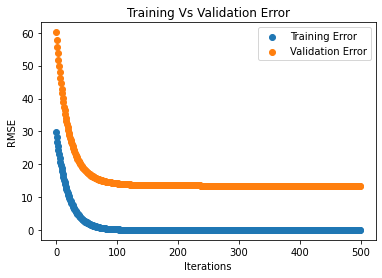

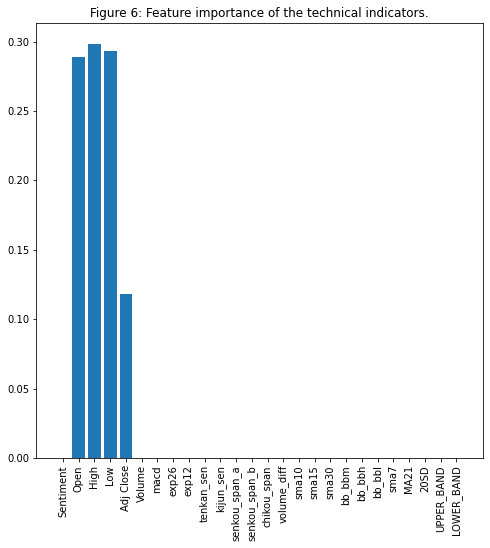

,0,1,2,3,4,result
0,0.265795,0.057012,0.069575,0.067568,0.064773,0.067568
1,0.265795,0.054483,0.067083,0.067296,0.062552,0.064614
2,0.265795,0.048973,0.062507,0.060748,0.057950,0.058177
3,0.265795,0.047841,0.056227,0.056159,0.054061,0.056856
4,0.265795,0.048356,0.059251,0.058771,0.055141,0.057457


[9 4 1 3 2]
26
30
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_69 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_138 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_138 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_139 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_139 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


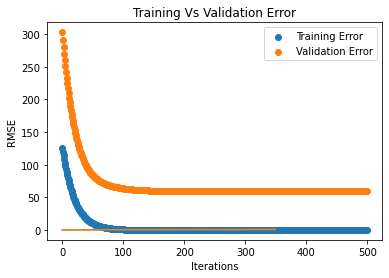

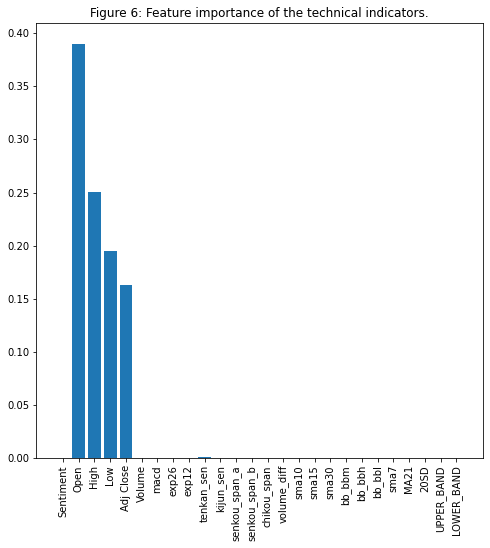

,0,1,2,3,4,result
0,0.287908,0.000584,0.000622,0.000466,0.000236,0.000584
1,0.287908,0.000140,0.000813,0.000513,0.000071,0.000140
2,0.287908,0.000607,0.000933,0.000489,0.000000,0.000607
3,0.287908,0.000490,0.001268,0.001724,0.002057,0.000490
4,0.287908,0.000000,0.001076,0.000652,0.000804,0.000000


[9 4 3 2 1]
26
30
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_70 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_140 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_140 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_141 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_141 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


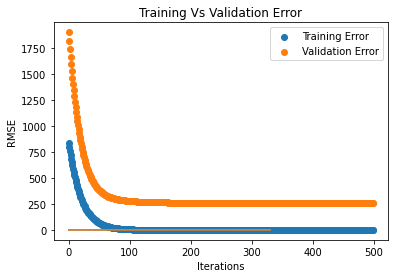

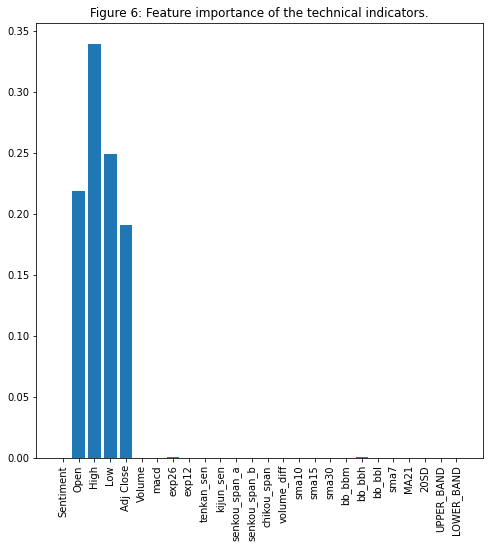

,0,1,2,3,4,result
0,0.255055,0.003076,0.002378,0.002599,0.001672,0.003076
1,0.255055,0.003472,0.002775,0.003675,0.002572,0.003472
2,0.255055,0.003699,0.002878,0.003772,0.002222,0.003699
3,0.255055,0.006854,0.004673,0.005855,0.005435,0.006854
4,0.255055,0.006149,0.006039,0.006166,0.005192,0.006149


[19  4  1  3  2]
26
30
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_71 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_142 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_142 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_143 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_143 (MaxPooli  (None, 5, 32)            0         
 ng1D)                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:54:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


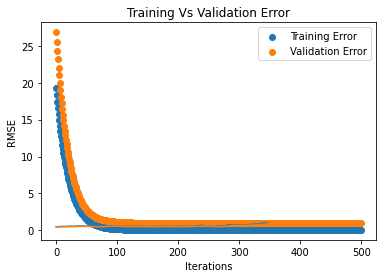

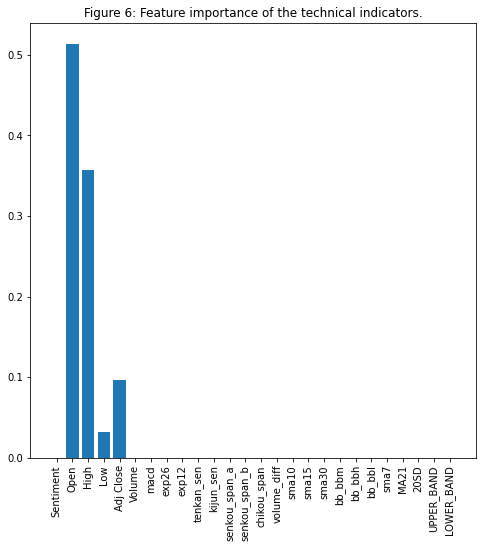

,0,1,2,3,4,result
0,0.024117,0.037845,0.035544,0.037959,0.037836,0.040634
1,0.023660,0.037022,0.033056,0.033878,0.036208,0.037790
2,0.024253,0.039079,0.038387,0.036327,0.034581,0.043885
3,0.024624,0.041958,0.037676,0.040000,0.041904,0.043072
4,0.024220,0.037433,0.033767,0.035918,0.039463,0.038602


[8 3 4 2 1]
26
30
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_72 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_144 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_144 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_145 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_145 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


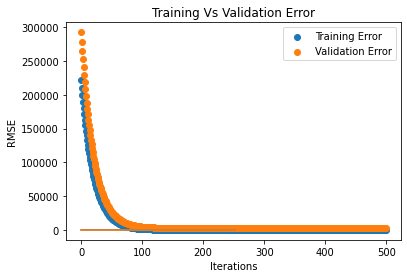

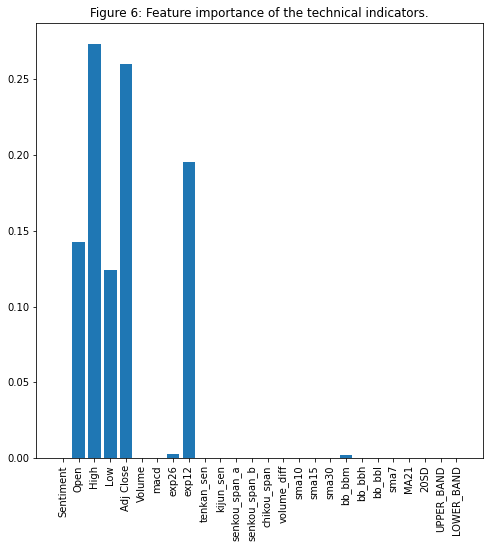

,0,1,2,3,4,result
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.015392,0.019356,0.000905,0.005809,0.006627,0.005809
2,0.013871,0.019693,0.001206,0.002824,0.006363,0.002824
3,0.014295,0.020841,0.001316,0.001899,0.008365,0.001899
4,0.016355,0.018736,0.002751,0.010508,0.011421,0.010508


[3 1 8 4 2]
26
30
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_73 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_73 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_146 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_146 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_147 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_147 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


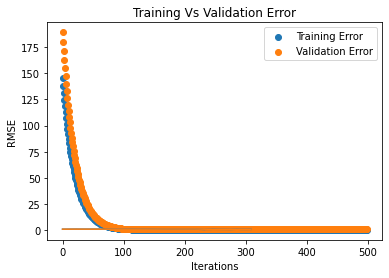

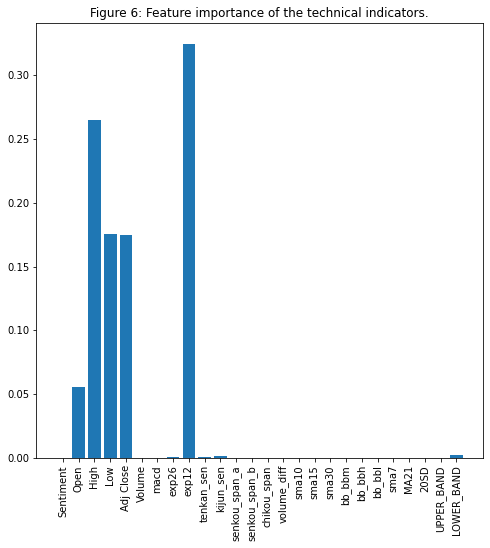

,0,1,2,3,4,result
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.018239,0.004979,0.015877,0.006495,0.000796,0.004979
2,0.015526,0.004672,0.012962,0.004661,0.001421,0.004672
3,0.020802,0.000919,0.013269,0.006724,0.001349,0.000919
4,0.018541,0.011106,0.016260,0.011385,0.002918,0.011106


[1 4 3 2 8]
26
30
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_74 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_148 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_148 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_149 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_149 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


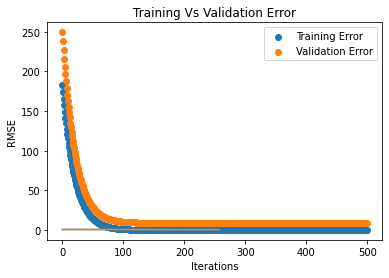

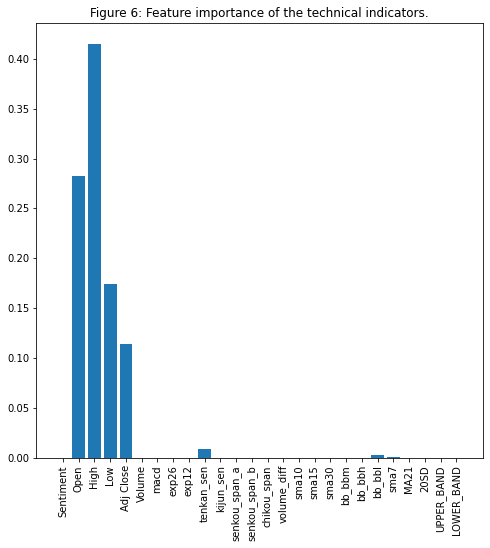

,0,1,2,3,4,result
0,0.441586,0.003333,0.000927,0.000000,0.002217,0.004365
1,0.441586,0.002676,0.003523,0.004013,0.003387,0.003504
2,0.441586,0.004695,0.004636,0.004383,0.004311,0.006148
3,0.441586,0.002113,0.002596,0.004322,0.001416,0.002766
4,0.441586,0.000000,0.000000,0.002037,0.000000,0.000000


[9 4 3 1 2]
26
30
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_75 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_150 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_150 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_151 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_151 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[01:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


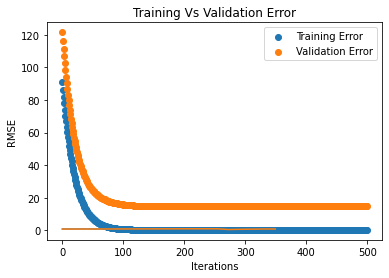

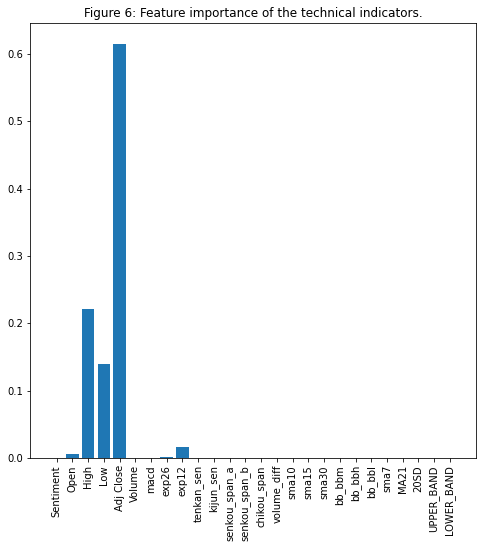

,0,1,2,3,4,result
0,0.003901,0.001476,0.004556,0.004094,0.004513,0.005145
1,0.006339,0.001650,0.006537,0.004972,0.005467,0.006234
2,0.009557,0.003350,0.011390,0.014720,0.013972,0.015931
3,0.013263,0.002856,0.004754,0.009066,0.003384,0.003859
4,0.004681,0.002105,0.003863,0.003412,0.001562,0.001781


[1 8 3 2 4]
26
30
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_76 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_152 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_152 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_153 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_153 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


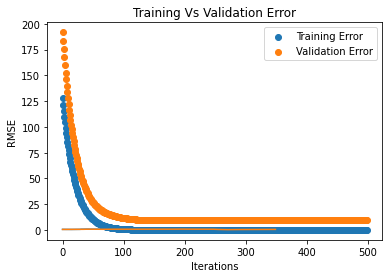

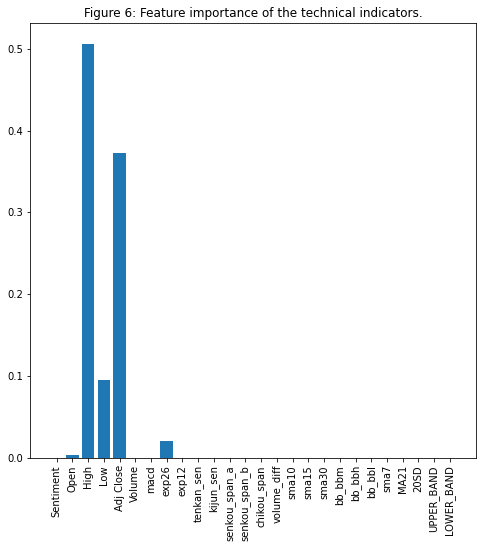

,0,1,2,3,4,result
0,0.062435,0.032509,0.059667,0.054119,0.054961,0.054119
1,0.046093,0.031624,0.043147,0.043093,0.044364,0.043093
2,0.045307,0.028891,0.024617,0.019241,0.037922,0.019241
3,0.024565,0.026297,0.021900,0.018446,0.020104,0.018446
4,0.037293,0.024949,0.034616,0.031591,0.032519,0.031591


[1 7 3 4 2]
26
30
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_77 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_77 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_154 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_154 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_155 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_155 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


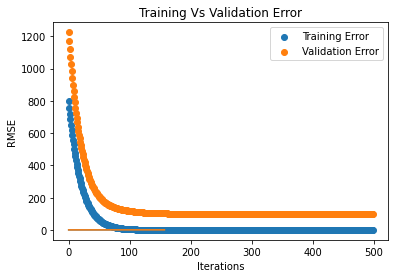

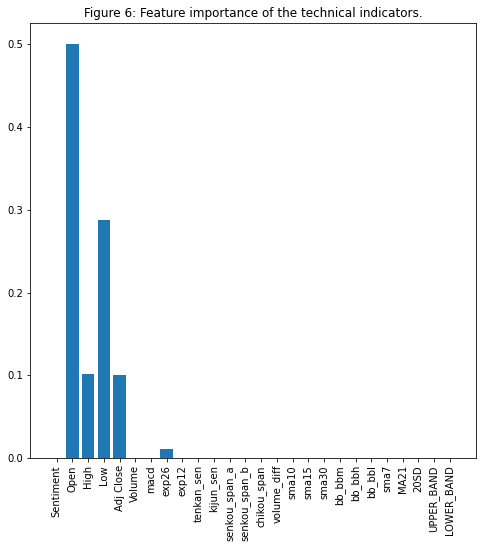

,0,1,2,3,4,result
0,0.091445,0.103381,0.098450,0.107850,0.100338,0.103381
1,0.091433,0.103229,0.099821,0.109111,0.102540,0.103229
2,0.091755,0.107364,0.104556,0.110199,0.101385,0.107364
3,0.092341,0.110915,0.106554,0.112759,0.106372,0.110915
4,0.092889,0.110996,0.108569,0.114366,0.110172,0.110996


[7 4 2 3 1]
26
30
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_78 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_78 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_156 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_156 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_157 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_157 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


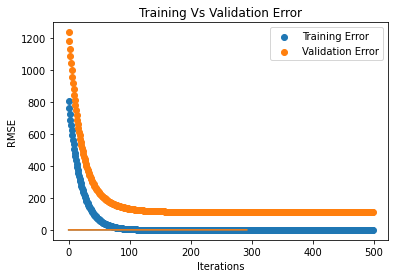

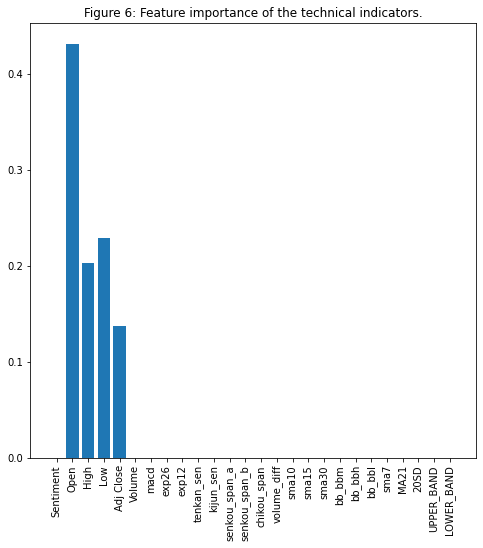

,0,1,2,3,4,result
0,0.088533,0.101192,0.097818,0.107868,0.100190,0.101192
1,0.088871,0.105381,0.102605,0.108967,0.099023,0.105381
2,0.089474,0.108979,0.104623,0.111551,0.104063,0.108979
3,0.090039,0.109061,0.106660,0.113174,0.107902,0.109061
4,0.090525,0.108599,0.104498,0.114753,0.105230,0.108599


[7 4 2 3 1]
26
30
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_79 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_79 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_158 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_158 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_159 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_159 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:05:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


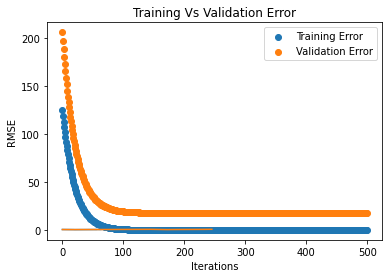

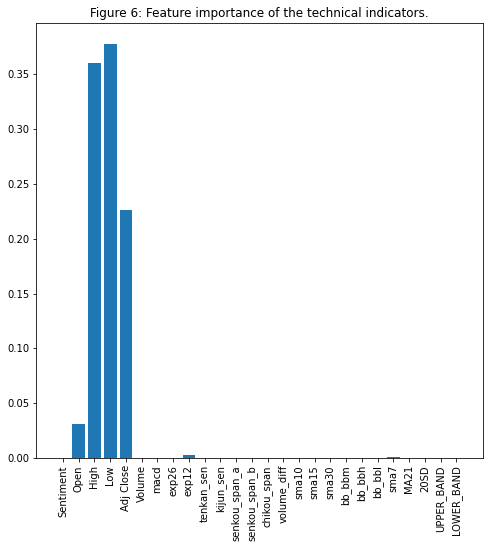

,0,1,2,3,4,result
0,0.001016,0.004910,0.002612,0.003581,0.001176,0.003240
1,0.000871,0.005973,0.001877,0.004690,0.003578,0.002329
2,0.000652,0.003088,0.001388,0.001866,0.003169,0.001721
3,0.000193,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000110,0.000759,0.001551,0.002320,0.001789,0.001924


[8 1 4 2 3]
26
30
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_80 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_160 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_160 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_161 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_161 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


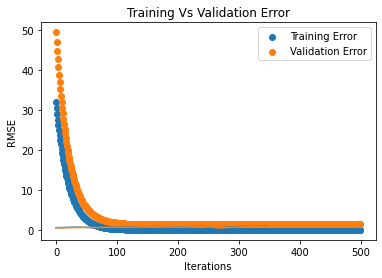

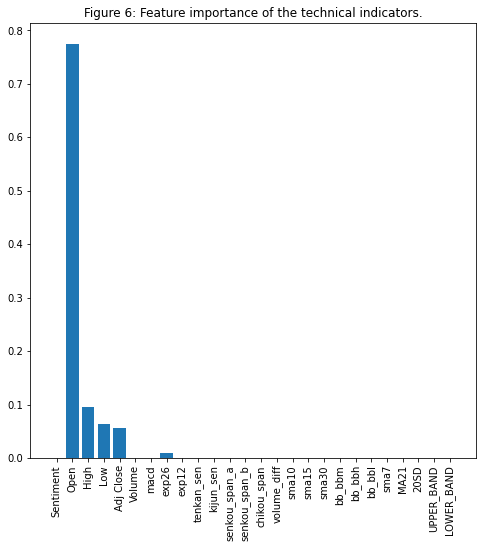

,0,1,2,3,4,result
0,0.010370,0.016719,0.023679,0.021766,0.020792,0.028104
1,0.011577,0.027834,0.041625,0.038640,0.037074,0.043255
2,0.012696,0.027834,0.041127,0.040108,0.041583,0.043255
3,0.013497,0.025683,0.041874,0.040108,0.040832,0.040323
4,0.014687,0.029806,0.043619,0.041820,0.039830,0.045943


[7 4 3 2 1]
26
30
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_81 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_162 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_162 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_163 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_163 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:08:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


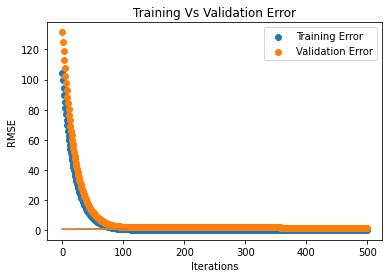

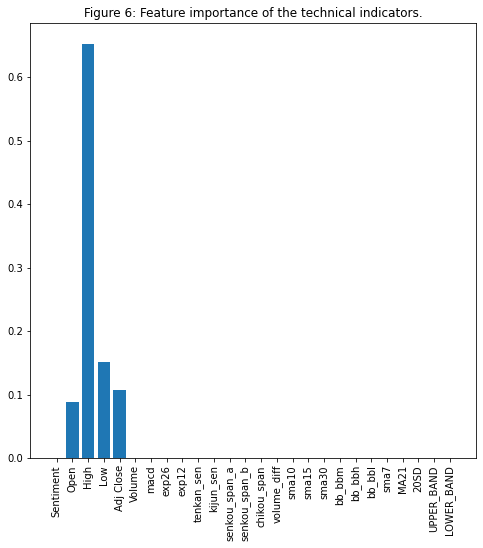

,0,1,2,3,4,result
0,0.536455,0.000473,0.000838,0.000000,0.000233,0.001180
1,0.536455,0.000000,0.000000,0.001792,0.000000,0.000000
2,0.536455,0.003074,0.006786,0.008483,0.008488,0.009555
3,0.536455,0.006147,0.005529,0.010633,0.006163,0.007786
4,0.536455,0.007802,0.008293,0.014337,0.009884,0.011679


[21  1  4  3  2]
26
30
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_82 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_164 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_164 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_165 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_165 (MaxPooli  (None, 5, 32)            0         
 ng1D)                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


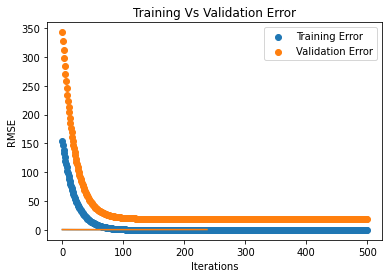

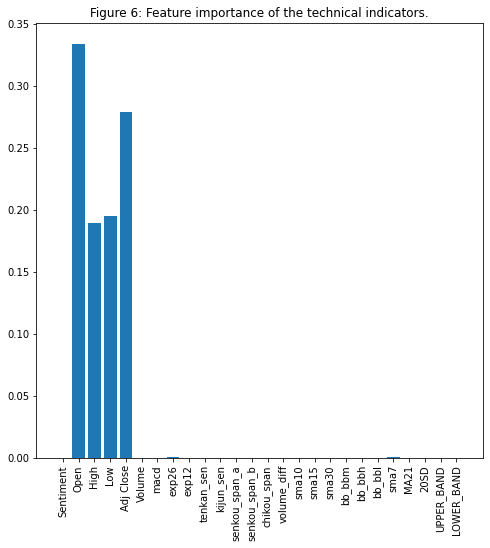

,0,1,2,3,4,result
0,0.000000,0.000000,0.000000,0.000000,0.000834,0.000000
1,0.000103,0.000537,0.000236,0.001222,0.000000,0.001222
2,0.000184,0.000483,0.001364,0.001059,0.001177,0.001059
3,0.000332,0.001511,0.001527,0.001918,0.001138,0.001918
4,0.000423,0.001317,0.001718,0.001374,0.002070,0.001374


[7 2 3 4 1]
26
30
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_83 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_83 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_166 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_166 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_167 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_167 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:11:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


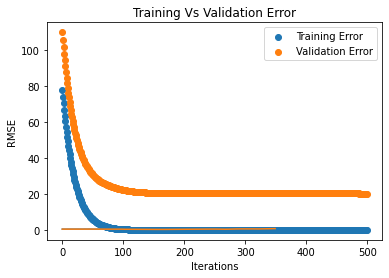

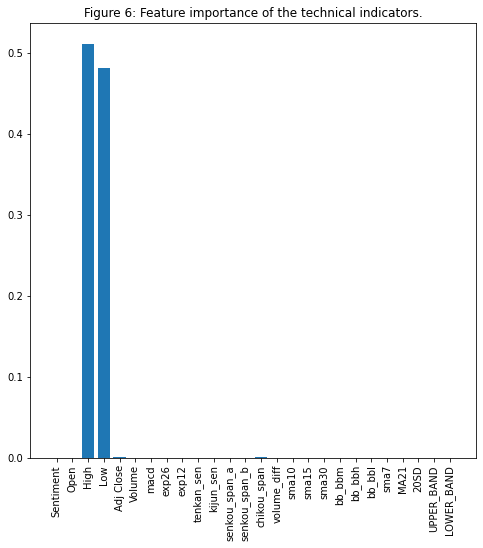

,0,1,2,3,4,result
0,0.001939,0.157752,0.004847,0.063657,0.020070,0.015064
1,0.001049,0.152674,0.001212,0.054563,0.010370,0.009479
2,0.000000,0.151997,0.000000,0.054888,0.007192,0.007617
3,0.000110,0.151151,0.004076,0.058298,0.013547,0.013879
4,0.001119,0.133040,0.007822,0.064794,0.016725,0.019634


[ 8 13  4  3  2]
26
30
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_84 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_168 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_168 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_169 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_169 (MaxPooli  (None, 5, 32)            0         
 ng1D)                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


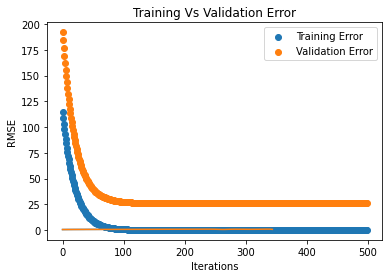

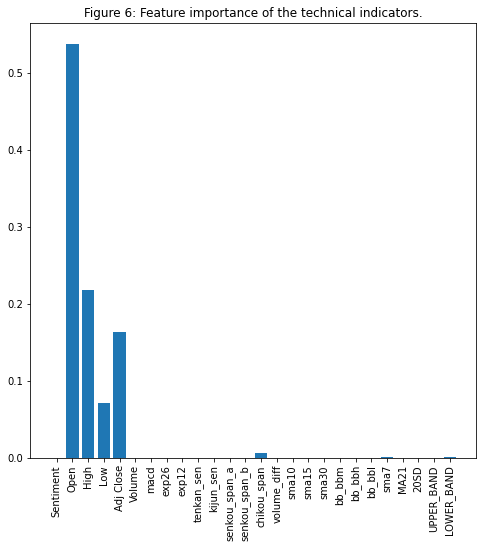

,0,1,2,3,4,result
0,0.008380,0.002690,0.004009,0.002708,0.001646,0.004440
1,0.008480,0.003570,0.002433,0.003249,0.003990,0.002694
2,0.007083,0.002638,0.001442,0.000985,0.002394,0.001596
3,0.008281,0.001500,0.001532,0.000394,0.000299,0.001696
4,0.008181,0.001086,0.000946,0.000689,0.001197,0.001048


[13  3  4  2  1]
26
30
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_85 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_85 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_170 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_170 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_171 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_171 (MaxPooli  (None, 5, 32)            0         
 ng1D)                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


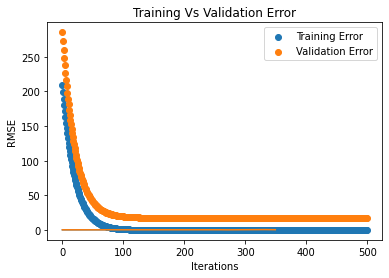

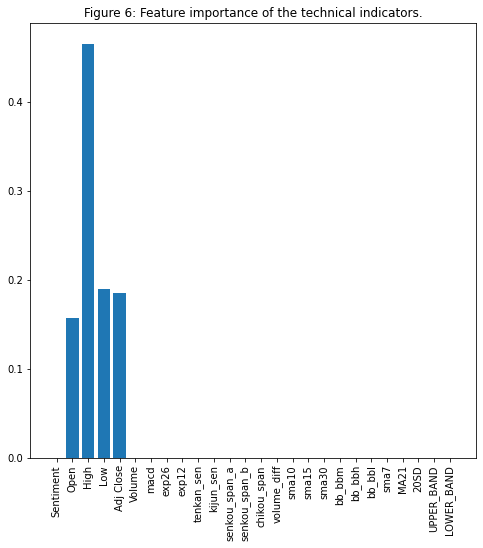

,0,1,2,3,4,result
0,0.450171,0.000000,0.002100,0.000000,0.001242,0.002645
1,0.450171,0.004567,0.000741,0.003165,0.002381,0.000934
2,0.450171,0.004463,0.003377,0.004877,0.003624,0.004253
3,0.450171,0.003841,0.001730,0.003632,0.001035,0.002179
4,0.450171,0.003114,0.000000,0.001297,0.000000,0.000000


[10  1  4  3  2]
26
30
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_86 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_172 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_172 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_173 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_173 (MaxPooli  (None, 5, 32)            0         
 ng1D)                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


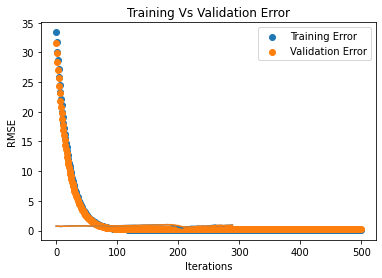

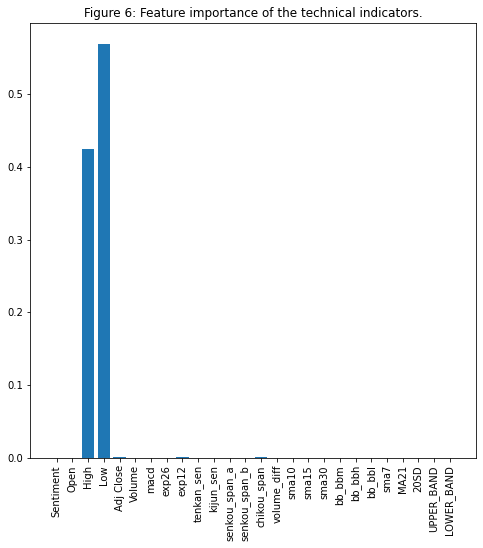

,0,1,2,3,4,result
0,0.504191,0.388632,0.049441,0.427070,0.478261,0.455090
1,0.522156,0.387555,0.045215,0.419036,0.466667,0.449102
2,0.543712,0.383952,0.034651,0.402349,0.456811,0.434132
3,0.547305,0.378105,0.023664,0.390606,0.435942,0.418563
4,0.553293,0.367773,0.002536,0.368974,0.410435,0.388623


[13  8  4  2  3]
26
30
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_87 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_87 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_174 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_174 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_175 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_175 (MaxPooli  (None, 5, 32)            0         
 ng1D)                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


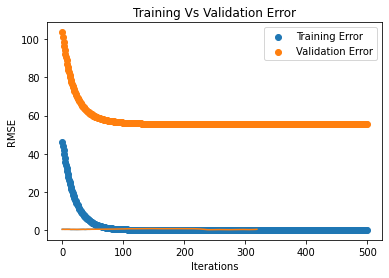

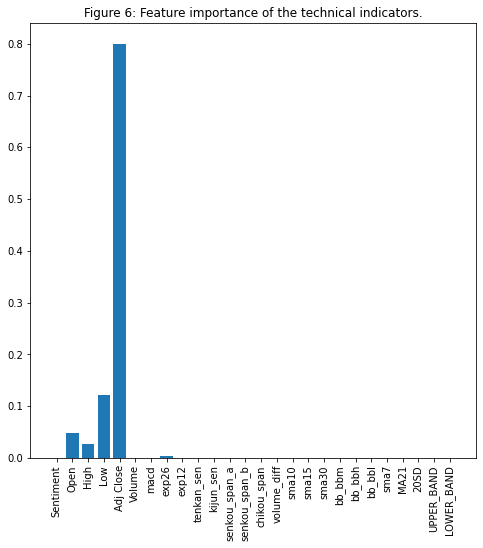

,0,1,2,3,4,result
0,0.000663,0.001175,0.001181,0.001807,0.001619,0.001619
1,0.000626,0.001175,0.001292,0.001835,0.001229,0.001229
2,0.000569,0.000806,0.001058,0.001258,0.000985,0.000985
3,0.000512,0.000806,0.001058,0.001244,0.000945,0.000945
4,0.000419,0.000636,0.000873,0.000695,0.000509,0.000509


[7 2 1 3 4]
26
30
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_88 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_88 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_176 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_176 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_177 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_177 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


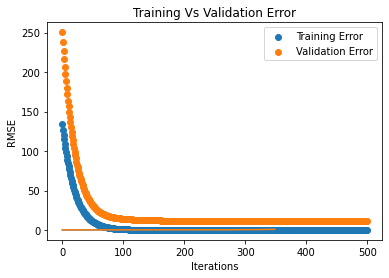

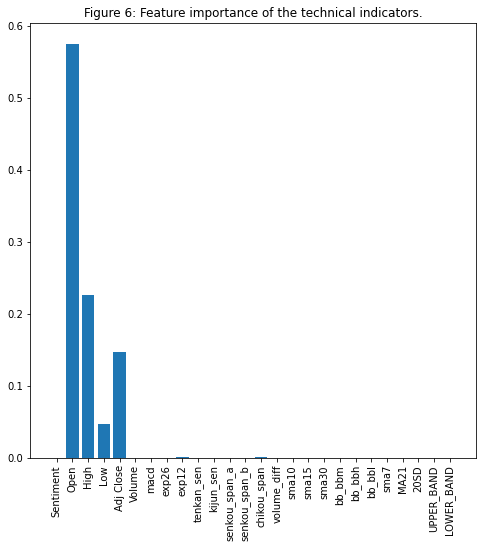

,0,1,2,3,4,result
0,0.006061,0.010542,0.010808,0.010766,0.012892,0.012367
1,0.004458,0.001949,0.002031,0.004993,0.007249,0.002324
2,0.003164,0.002785,0.002375,0.001911,0.002390,0.002717
3,0.002069,0.000756,0.002375,0.000351,0.001136,0.002717
4,0.000709,0.000000,0.000000,0.000000,0.001607,0.000000


[8 3 4 2 1]
26
30
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_89 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_89 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_178 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_178 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_179 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_179 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


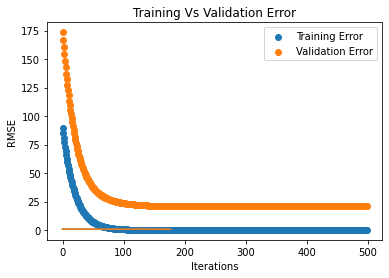

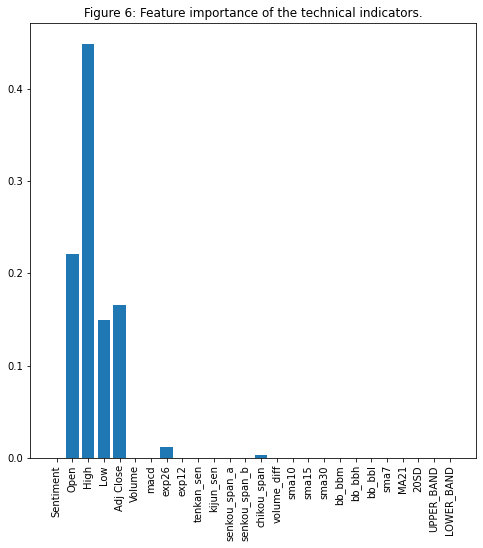

,0,1,2,3,4,result
0,0.003967,0.008041,0.009007,0.009777,0.008428,0.010051
1,0.003822,0.007405,0.007284,0.010683,0.008742,0.008218
2,0.003761,0.007737,0.008159,0.007448,0.006571,0.009149
3,0.003648,0.007810,0.007473,0.009605,0.007371,0.008418
4,0.003520,0.007146,0.007204,0.007506,0.005714,0.008132


[7 3 4 1 2]
26
30
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_90 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_180 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_180 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_181 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_181 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


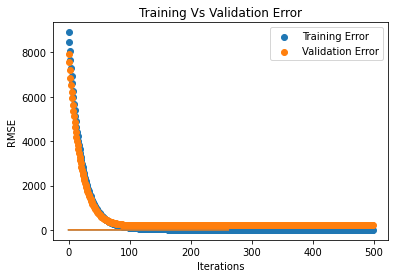

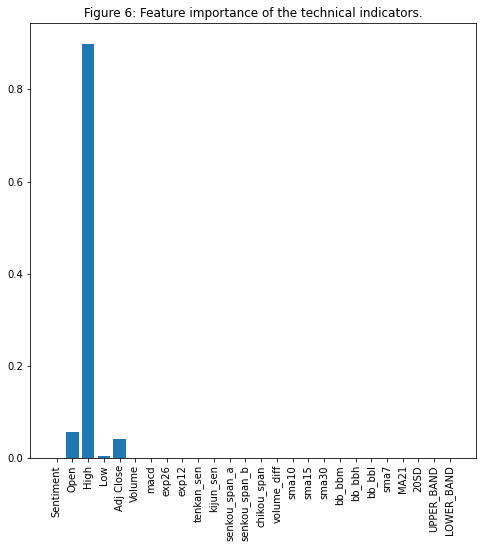

,0,1,2,3,4,result
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984209,0.915361,0.898227,0.929350,0.897953,0.898227
2,0.954513,0.813092,0.792942,0.872833,0.838702,0.792942
3,0.914139,0.714348,0.694675,0.802187,0.739949,0.694675
4,0.866907,0.626180,0.610446,0.639695,0.604983,0.610446


[8 3 4 1 2]
26
30
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_91 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_91 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_182 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_182 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_183 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_183 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:26:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


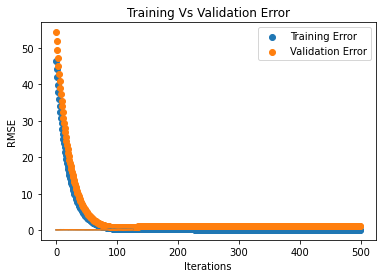

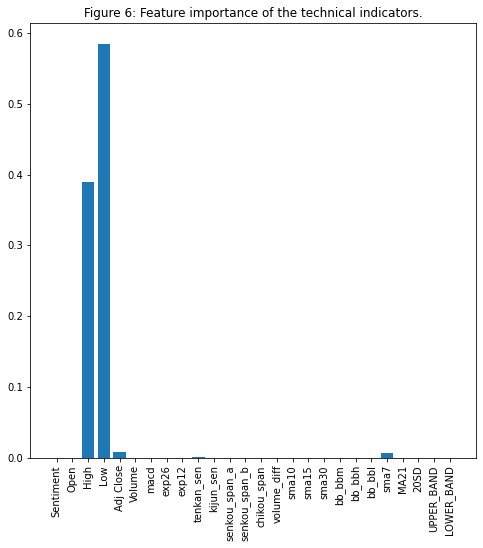

,0,1,2,3,4,result
0,0.458381,0.456141,0.052953,0.121963,0.248175,0.134241
1,0.458381,0.456141,0.048067,0.117501,0.246028,0.124027
2,0.458381,0.456141,0.053650,0.114527,0.244311,0.135700
3,0.458381,0.456141,0.062724,0.139812,0.255474,0.154669
4,0.458381,0.456141,0.037423,0.109569,0.213826,0.077335


[ 9 21  4  2  3]
26
30
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_92 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_92 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_184 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_184 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_185 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_185 (MaxPooli  (None, 5, 32)            0         
 ng1D)                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
[02:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


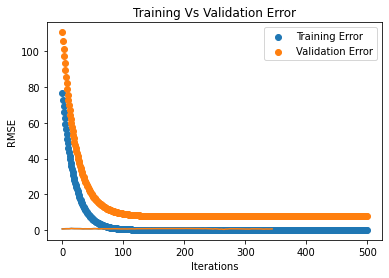

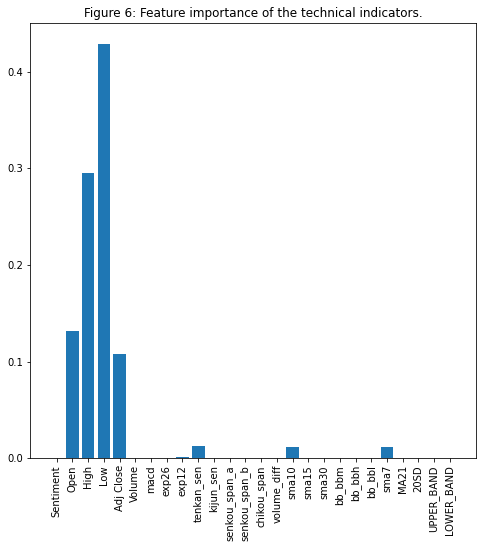

,0,1,2,3,4,result
0,0.432134,0.283231,0.341797,0.347648,0.349279,0.358028
1,0.432134,0.264043,0.340202,0.335359,0.334981,0.334444
2,0.432134,0.282689,0.333555,0.349234,0.339524,0.357362
3,0.432134,0.283448,0.351502,0.354651,0.358365,0.358294
4,0.432134,0.280629,0.351635,0.352141,0.356227,0.354830


[9 4 1 2 3]
26
30
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              (None, 30, 64)            18176     
                                                                 
 dropout_93 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_186 (Conv1D)         (None, 30, 32)            8224      
                                                                 
 max_pooling1d_186 (MaxPooli  (None, 10, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_187 (Conv1D)         (None, 10, 32)            3104      
                                                                 
 max_pooling1d_187 (MaxPooli  (None, 5, 32)            0         
 ng1D)                             

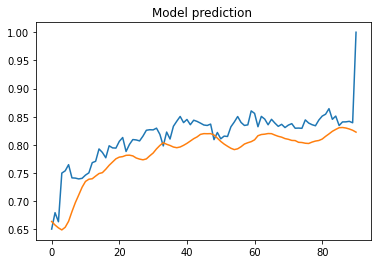

In [ ]:
list_accuracy=[]
name_list=[]
time_step_list=[50]

output_dim=1
for i in range(len(symbols)):#12,13
   gk = sentiment_data.groupby('Symbol')
   data2=gk.get_group(symbols[i]) 
   name=symbols[i]
   print('  -----------------------------------------------'+name+'-------------------------------------------------------------------')
   name_list.append(name)
   data2=data2.reset_index()
   m_data=get_data(symbols[i])
   m_data['Date']=m_data.index
   m_data=m_data.reset_index(drop=True)
   import time
   for p in range(len(data2)):
        data2['Date'][p]=str(data2['Date'][p])+' '+'00:00:00'
   for j in range(len(m_data)):
        m_data['Date'][j]=str(m_data['Date'][j])  

      #             merging   

   df_1=pd.merge(data2,m_data,on='Date')  

      #         feature engineering 

   df=feature_engineering(df_1)

      #   filling missing values 
   print(1)
   X=imputer(df)
   columns_name=df.columns
   df_new=pd.DataFrame(X)
   for i in range(df_new.shape[1]):
        df_new = df_new.rename({ i:columns_name[i]},axis=1)
   data_after_feature_engineering,list_best_feature,ft,sc=visualizition_feature_engineering(df,X)
   display(data_after_feature_engineering[:5])
   print(list_best_feature)
      #       Train test data creation 


   for time_step_i in range(len(time_step_list)):
      print(i)
      time_step=time_step_list[time_step_i]
      input_dim=time_step
      print(input_dim)
      
     

      train,test,y_tr,y_tes=split_train_test(data_after_feature_engineering,data_after_feature_engineering.iloc[:,-1],input_dim)#change 
      X_train,y_train=get_X_y(train,y_tr,input_dim,output_dim)
      X_test,y_test=get_X_y(test,y_tes,input_dim,output_dim)    

      #X_train,y_train,data_test,data_training=create_train_data(data_after_feature_engineering,time_step,0.90)
      #X_test,y_test=create_test_data(data_training,time_step,data_test)
      #     model training 

      model=model1_lstm(input_dim, output_dim, X_train.shape[2])
      model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
      histoty=model.fit(X_train, y_train, batch_size=256, epochs=150,validation_split=0.1)

      doros=cheak_model(model,y_test,X_test,name)
      list_accuracy.append(doros/len(X_test))




In [ ]:
name_list

['AAPL',
 'ADBE',
 'AMZN',
 'BAC',
 'BRK.A',
 'BRK.B',
 'DIA',
 'DIS',
 'FB',
 'GOOG',
 'GOOGL',
 'HD',
 'INTC',
 'JNJ',
 'NFLX',
 'PG',
 'QQQ',
 'SPY',
 'T',
 'TSLA',
 'UNH',
 'V',
 'VIX',
 'VZ',
 'WMT']

In [ ]:
def model1_lstm(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
  model=Sequential()
  model.add(LSTM(units = 64, return_sequences = True, input_shape =(input_dim,feature_size)))
  model.add(Dropout(0.1))
  model.add(Convolution1D(32, 4, padding='same'))
  model.add(MaxPooling1D(pool_size=3))
  
  model.add(Convolution1D(32, 3, padding='same'))
  model.add(MaxPooling1D(pool_size=2))




  model.add(Flatten())
  #model.add(Dense(units=32))
  model.add(Dense(units=1))
  
  model.summary()
  return model

In [ ]:

from keras import Sequential
from keras.layers import Dense, LSTM,Dropout
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D,Convolution1D
from keras.layers import Dense, Activation, Flatten, Reshape,RepeatVector
from keras.layers import TimeDistributed
model=model1_lstm(input_dim, output_dim, X_train.shape[2])
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
histoty=model.fit(X_train, y_train, batch_size=128, epochs=300,validation_split=0.1)#taghir dad

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 64)            17920     
                                                                 
 dropout_6 (Dropout)         (None, 60, 64)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 60, 32)            8224      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 20, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 20, 32)            3104      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 10, 32)           0         
 g1D)                                                 

0.006432024456306294

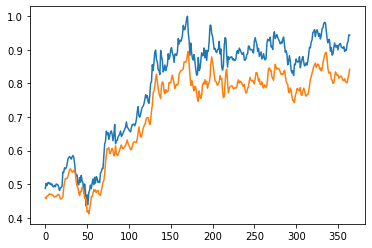

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
mean_squared_error(y_pred,y_test)

In [ ]:

def cheak_model(model,y_test,X_test):
    y_pred=model.predict(X_test)
    plt.title('Model prediction ',symbols[i])
    plt.plot(y_test)
    plt.plot(y_pred)
    plt.plot()
    mean_squared_error(y_pred,y_test)
    doros=0
    for i in range(1,len(y_test)):
      if y_test[i-1]>y_test[i]:
        if y_pred[i-1]>y_pred[i]:
          doros=doros+1
      if y_test[i-1]<y_test[i]:
        if y_pred[i-1]<y_pred[i]:
          doros=doros+1      
    print('accuracy: ',doros/len(y_test))      

In [ ]:
doros/len(y_test)

0.4684931506849315

In [ ]:

model=model1(input_dim, output_dim, X_train.shape[2])
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
histoty=model.fit(X_train, y_train, batch_size=300, epochs=300)#taghir dad

Epoch 1/300
6/6 [==============================] - 11s 232ms/step - loss: 0.0402 - mean_absolute_error: 0.1356
Epoch 2/300
6/6 [==============================] - 1s 202ms/step - loss: 0.0141 - mean_absolute_error: 0.0901
Epoch 3/300
6/6 [==============================] - 1s 200ms/step - loss: 0.0060 - mean_absolute_error: 0.0575
Epoch 4/300
6/6 [==============================] - 1s 187ms/step - loss: 0.0025 - mean_absolute_error: 0.0382
Epoch 5/300
6/6 [==============================] - 1s 204ms/step - loss: 0.0021 - mean_absolute_error: 0.0368
Epoch 6/300
6/6 [==============================] - 1s 196ms/step - loss: 0.0015 - mean_absolute_error: 0.0299
Epoch 7/300
6/6 [==============================] - 1s 203ms/step - loss: 0.0012 - mean_absolute_error: 0.0238
Epoch 8/300
6/6 [==============================] - 1s 192ms/step - loss: 9.2286e-04 - mean_absolute_error: 0.0224
Epoch 9/300
6/6 [==============================] - 1s 193ms/step - loss: 7.6578e-04 - mean_absolute_error: 0.0202
E

In [ ]:


def model1(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(Convolution1D(512, input_shape= (input_dim,feature_size), kernel_size=4, padding='same'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(LSTM(units=256, return_sequences = True))

    model.add(LSTM(units=128, return_sequences = True))

    model.add(LSTM(units=128, return_sequences = True)) # 256, return_sequences = True
      # model.add(Dropout(0.1))
    model.add(LSTM(units=128, return_sequences = True,recurrent_dropout=0.2)) #, recurrent_dropout=0.1
    model.add(LSTM(units=64)) #, recurrent_dropout=0.1
    # , recurrent_dropout = 0.2
    #model.add(Dense(128))
    # model.add(Dense(128))
    #model.add(Dense(64))
    #model.add(Dense(16))
    
    model.add(Dense(units=output_dim))
    return model
   

In [ ]:
X_train